In [18]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from IPython.display import display

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [20]:
data_file = 'kiwi_simplified_data.pkl'  # Update this path if needed

# Loading pickle files is as simple as this:
with open(data_file, 'rb') as f:
    data = pickle.load(f)

In [21]:
data

{'data': {'300': {'cube': array([[[45.1, 46.6, 38.2, ..., 51.2, 41.8, 44.9],
           [53.9, 37.5, 50.9, ..., 46.1, 36. , 46.4],
           [48.4, 36.5, 39.9, ..., 45.2, 43.3, 32.5],
           ...,
           [30.4, 37.7, 40.3, ..., 39.5, 28.1, 29.2],
           [37.1, 34.5, 32.6, ..., 32. , 39.2, 38.1],
           [26.6, 42.8, 47.3, ..., 54.6, 40.2, 43.4]],
   
          [[41.4, 39.8, 32.3, ..., 36.9, 51.2, 25.7],
           [49.9, 28.9, 46.5, ..., 34.3, 42. , 40.4],
           [53.9, 45.6, 35.5, ..., 42. , 39.6, 39.9],
           ...,
           [35.7, 35.6, 44.4, ..., 22.5, 35.7, 42.5],
           [40.4, 36.6, 33.3, ..., 28.5, 35.5, 44.5],
           [39.9, 34.7, 32.7, ..., 42. , 49.5, 36.5]],
   
          [[38.4, 38.4, 34. , ..., 27.6, 35.3, 35.1],
           [39.2, 26.1, 40.3, ..., 37.9, 28.3, 40.1],
           [60.4, 43.7, 39.4, ..., 34.5, 43.9, 35.3],
           ...,
           [37. , 27.2, 43. , ..., 33.5, 33. , 33.2],
           [32.1, 40.8, 33.7, ..., 23.6, 26.7, 30.6],
 

In [9]:
print("Keys in the data dictionary:")
print(list(data.keys()))

# If using the class structure I provided:
hyperspectral_data = data['data']
metadata = data['metadata']

print("\nMetadata:")
for key, value in metadata.items():
    print(f"  {key}: {value}")

print("\nAvailable excitation wavelengths:")
excitation_keys = [key for key in hyperspectral_data.keys() if key != 'Reflectance']
print(excitation_keys)

Keys in the data dictionary:
['data', 'metadata']

Metadata:
  processed_date: 2025-04-16 11:59:32
  cutoff_offset: 30
  reflectance_range: (400, 500)
  excitation_wavelengths: [300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]
  valid_reflectance_excitations: [400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]

Available excitation wavelengths:
['300', '310', '320', '330', '340', '350', '360', '370', '380', '390', '400', '410', '420', '430', '440', '450', '460', '470', '480', '490', '500']


In [11]:
example_excitation = excitation_keys[0]
print(f"\nExamining data for excitation {example_excitation}nm:")

ex_data = hyperspectral_data[example_excitation]
print(f"  Keys in this dataset: {list(ex_data.keys())}")
print(f"  Cube shape (bands, height, width): {ex_data['cube'].shape}")
print(f"  Wavelength range: {ex_data['wavelengths'].min():.1f} - {ex_data['wavelengths'].max():.1f} nm")
print(f"  Number of emission bands: {len(ex_data['wavelengths'])}")


Examining data for excitation 300nm:
  Keys in this dataset: ['cube', 'wavelengths', 'excitation']
  Cube shape (bands, height, width): (141, 512, 640)
  Wavelength range: 401.4 - 1072.9 nm
  Number of emission bands: 141


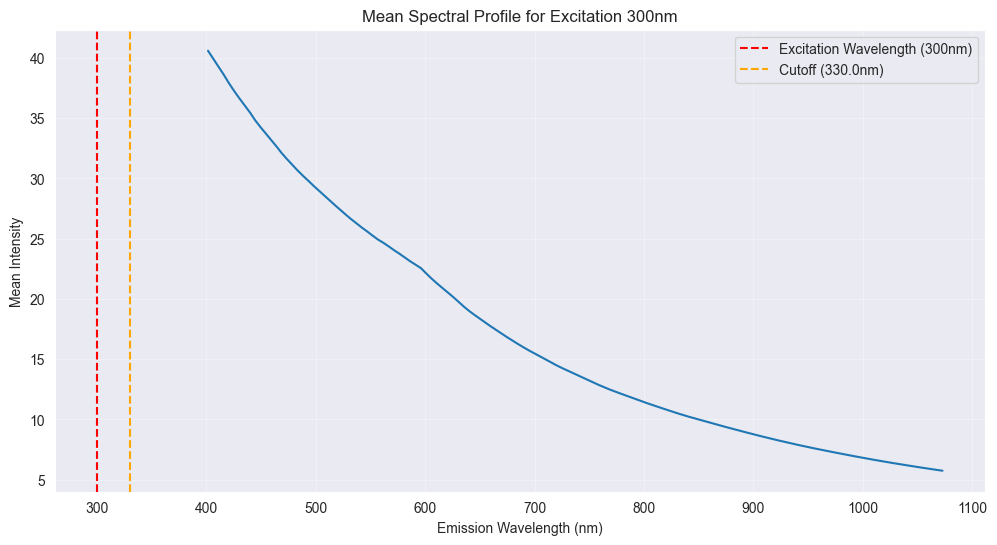

In [12]:
mean_spectrum = np.mean(ex_data['cube'], axis=(1, 2))

plt.figure(figsize=(12, 6))
plt.plot(ex_data['wavelengths'], mean_spectrum)
plt.xlabel('Emission Wavelength (nm)')
plt.ylabel('Mean Intensity')
plt.title(f'Mean Spectral Profile for Excitation {example_excitation}nm')
plt.grid(True, alpha=0.3)
plt.axvline(x=float(example_excitation), color='r', linestyle='--',
            label=f'Excitation Wavelength ({example_excitation}nm)')
plt.axvline(x=float(example_excitation) + metadata['cutoff_offset'], color='orange', linestyle='--',
            label=f'Cutoff ({float(example_excitation) + metadata["cutoff_offset"]}nm)')
plt.legend()
plt.show()

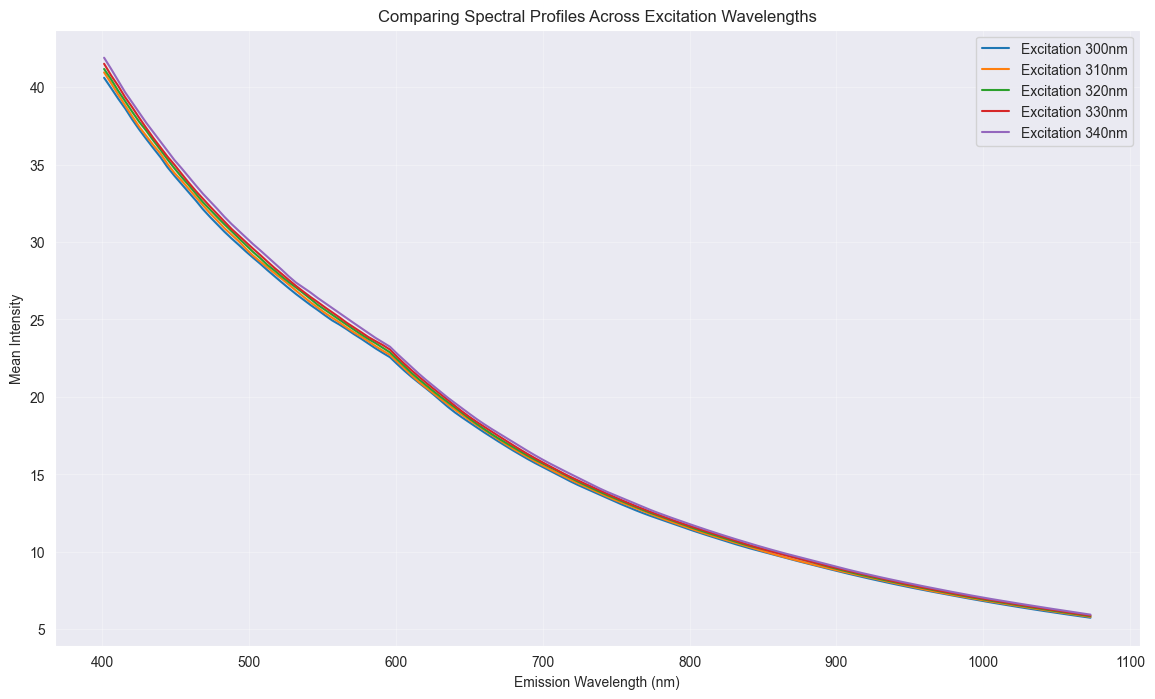

In [13]:
plt.figure(figsize=(14, 8))

# Plot several excitation wavelengths to compare
for i, ex_key in enumerate(excitation_keys[:5]):  # Show first 5 excitations
    ex_data = hyperspectral_data[ex_key]
    mean_spectrum = np.mean(ex_data['cube'], axis=(1, 2))
    plt.plot(ex_data['wavelengths'], mean_spectrum, label=f'Excitation {ex_key}nm')

plt.xlabel('Emission Wavelength (nm)')
plt.ylabel('Mean Intensity')
plt.title('Comparing Spectral Profiles Across Excitation Wavelengths')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

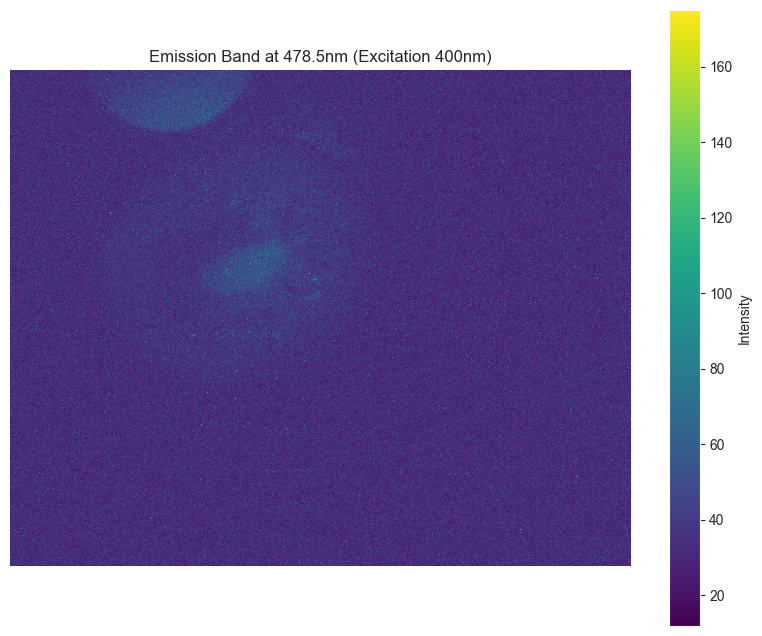

In [15]:
band_idx = 10  # This selects the 10th emission band
example_excitation = excitation_keys[10]
emission_wavelength = hyperspectral_data[example_excitation]['wavelengths'][band_idx]

# Get the image data for this band
band_image = hyperspectral_data[example_excitation]['cube'][band_idx, :, :]

plt.figure(figsize=(10, 8))
plt.imshow(band_image, cmap='viridis')
plt.colorbar(label='Intensity')
plt.title(f'Emission Band at {emission_wavelength:.1f}nm (Excitation {example_excitation}nm)')
plt.axis('off')
plt.show()

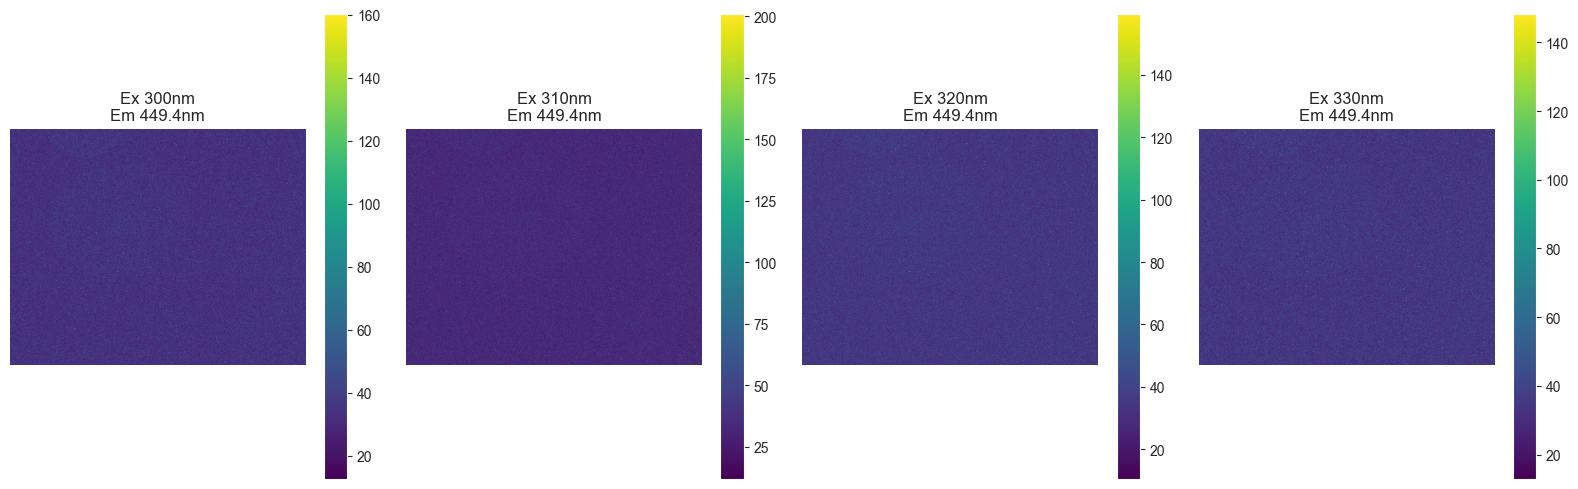

In [16]:
num_excitations = min(4, len(excitation_keys))

# Create a figure with subplots
fig, axs = plt.subplots(1, num_excitations, figsize=(16, 5))

# Select a specific emission band (index may need adjustment for different excitations)
# Let's choose a band that's likely present in all excitations after cutoff
relative_band_idx = 10  # 10th band from the beginning of each excitation's data

for i, ex_key in enumerate(excitation_keys[:num_excitations]):
    # Make sure the index is valid
    ex_data = hyperspectral_data[ex_key]
    if relative_band_idx < len(ex_data['wavelengths']):
        band_idx = relative_band_idx
        emission_wavelength = ex_data['wavelengths'][band_idx]
        band_image = ex_data['cube'][band_idx, :, :]

        im = axs[i].imshow(band_image, cmap='viridis')
        axs[i].set_title(f'Ex {ex_key}nm\nEm {emission_wavelength:.1f}nm')
        axs[i].axis('off')
        plt.colorbar(im, ax=axs[i])

plt.tight_layout()
plt.show()


Exploring Reflectance Data:
  Reflectance cube shape: (11, 512, 640)
  Valid excitation wavelengths: [400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]


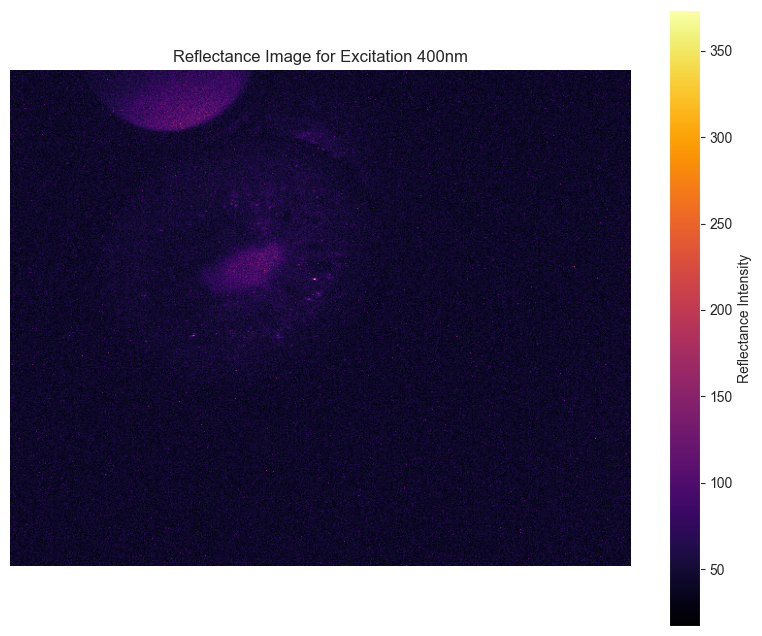

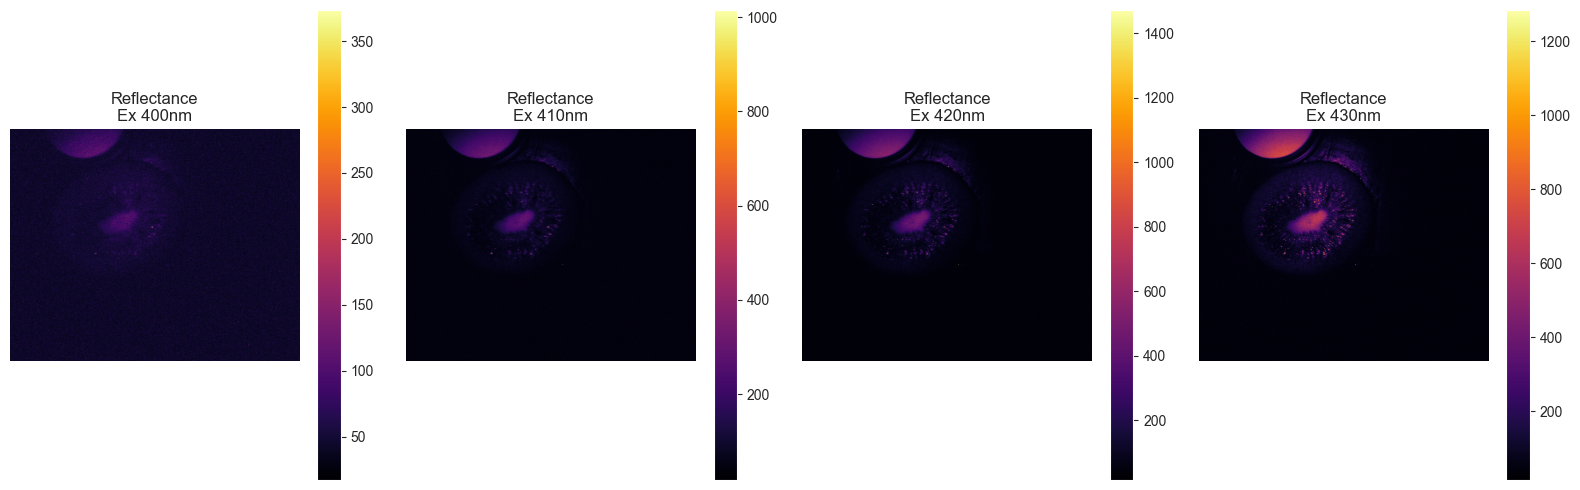

In [17]:
if 'Reflectance' in hyperspectral_data:
    print("\nExploring Reflectance Data:")
    refl_data = hyperspectral_data['Reflectance']
    print(f"  Reflectance cube shape: {refl_data['cube'].shape}")
    print(f"  Valid excitation wavelengths: {refl_data['excitation_wavelengths']}")

    # Visualize a slice of the reflectance cube
    if len(refl_data['excitation_wavelengths']) > 0:
        # Choose an index for visualization
        refl_idx = 0  # First excitation in the reflectance cube
        ex_wavelength = refl_data['excitation_wavelengths'][refl_idx]

        # Get the reflectance image
        refl_image = refl_data['cube'][refl_idx, :, :]

        plt.figure(figsize=(10, 8))
        plt.imshow(refl_image, cmap='inferno')
        plt.colorbar(label='Reflectance Intensity')
        plt.title(f'Reflectance Image for Excitation {ex_wavelength}nm')
        plt.axis('off')
        plt.show()

        # Compare reflectance images across different excitations
        num_refl = min(4, len(refl_data['excitation_wavelengths']))

        fig, axs = plt.subplots(1, num_refl, figsize=(16, 5))

        for i in range(num_refl):
            ex_wavelength = refl_data['excitation_wavelengths'][i]
            refl_image = refl_data['cube'][i, :, :]

            im = axs[i].imshow(refl_image, cmap='inferno')
            axs[i].set_title(f'Reflectance\nEx {ex_wavelength}nm')
            axs[i].axis('off')
            plt.colorbar(im, ax=axs[i])

        plt.tight_layout()
        plt.show()
else:
    print("\nNo reflectance data available in this dataset.")

Metadata:
  processed_date: 2025-04-16 12:15:08
  cutoff_offset: 30
  reflectance_range: (400, 500)
  excitation_wavelengths: [300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]
  valid_reflectance_excitations: [400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]
